In [26]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [27]:
# Unpickle all dataframes

air_quality_df = pd.read_pickle('~/ds/metis/metisgh/project_luther/data/pickles/air_quality.pkl')

elevation_df = pd.read_pickle('~/ds/metis/metisgh/project_luther/data/pickles/elevation.pkl')

humidity_df = pd.read_pickle('~/ds/metis/metisgh/project_luther/data/pickles/humidity.pkl')

num_clear_df= pd.read_pickle('~/ds/metis/metisgh/project_luther/data/pickles/num_clear.pkl')

pct_water_df= pd.read_pickle('~/ds/metis/metisgh/project_luther/data/pickles/pct_water.pkl')

precip_df= pd.read_pickle('~/ds/metis/metisgh/project_luther/data/pickles/precip.pkl')

temp_df = pd.read_pickle('~/ds/metis/metisgh/project_luther/data/pickles/temp.pkl')

happy2018_df= pd.read_pickle('~/ds/metis/metisgh/project_luther/data/pickles/happy2018.pkl')

happy2017_df= pd.read_pickle('~/ds/metis/metisgh/project_luther/data/pickles/happy2017.pkl')

happy2016_df= pd.read_pickle('~/ds/metis/metisgh/project_luther/data/pickles/happy2016.pkl')


In [28]:
# Join all dataframes by state

combined_df = air_quality_df.join(humidity_df).join(num_clear_df).join(pct_water_df).join(precip_df).join(temp_df).join(elevation_df).join(happy2018_df).join(happy2017_df).join(happy2016_df)

In [29]:
# Drop Washington DC

combined_df = combined_df.dropna().sort_index()

In [30]:
# Check to see if length is 50

len(combined_df.index.unique())

50

In [31]:
# Clean up column names

combined_df.rename(columns={'Number of Clear Days': 'avg_num_clear_days'}, inplace = True)
combined_df.rename(columns={'Highest Point': 'highest_point_ft'}, inplace = True)
combined_df.rename(columns={'Mean Elevation': 'mean_elevation_ft'}, inplace = True)
combined_df.rename(columns={'Air Quality Index': 'air_quality'}, inplace = True)
combined_df.rename(columns={'Relative Humidity': 'rel_humidity'}, inplace = True)
combined_df.rename(columns={'Percent Area Water': 'pct_area_water'}, inplace = True)
combined_df.rename(columns={'Rainfall (Inches)': 'rainfall_inches'}, inplace = True)
combined_df.rename(columns={'Temperature (Fahrenheit)': 'temp_f'}, inplace = True)
combined_df.rename(columns={'Happiness (2018)': 'happiness_2018'}, inplace = True)
combined_df.rename(columns={'Happiness (2017)': 'happiness_2017'}, inplace = True)
combined_df.rename(columns={'Happiness (2016)': 'happiness_2016'}, inplace = True)


In [32]:
# Check it out!
combined_df

,air_quality,rel_humidity,avg_num_clear_days,pct_area_water,rainfall_inches,temp_f,highest_point_ft,mean_elevation_ft,happiness_2018,happiness_2017,happiness_2016
Alabama,46.6,52.0,99.0,3.4,58.3,62.8,2413.0,500.0,39.35,60.8,61.0
Alaska,29.1,64.0,61.0,14.2,22.5,26.6,20310.0,1900.0,38.21,61.6,64.0
Arizona,45.4,25.0,193.0,0.3,13.6,60.3,12637.0,4100.0,52.92,62.2,63.4
Arkansas,43.1,49.0,123.0,2.1,50.6,60.4,2753.0,650.0,36.61,59.4,60.8
California,46.0,62.0,146.0,4.8,22.2,59.4,14505.0,2900.0,63.14,62.3,63.0
Colorado,47.1,35.0,136.0,0.4,15.9,45.1,14440.0,6800.0,55.38,62.9,63.5
Connecticut,45.0,52.0,82.0,12.6,50.3,49.0,2379.0,500.0,58.24,61.7,61.7
Delaware,46.4,54.0,97.0,21.7,45.7,55.3,447.0,60.0,51.67,60.7,61.4
Florida,38.9,57.0,101.0,18.5,54.5,70.7,345.0,100.0,51.01,62.4,63.1
Georgia,48.2,50.0,112.0,3.2,50.7,63.5,4784.0,600.0,55.15,61.3,62.3


### Now, let's model

In [33]:
# Take a look at the datatypes
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 11 columns):
air_quality           50 non-null float64
rel_humidity          50 non-null float64
avg_num_clear_days    50 non-null float64
pct_area_water        50 non-null float64
rainfall_inches       50 non-null float64
temp_f                50 non-null float64
highest_point_ft      50 non-null float64
mean_elevation_ft     50 non-null float64
happiness_2018        50 non-null float64
happiness_2017        50 non-null float64
happiness_2016        50 non-null float64
dtypes: float64(11)
memory usage: 4.7+ KB


In [34]:
# View the correlations
combined_df.corr()

,air_quality,rel_humidity,avg_num_clear_days,pct_area_water,rainfall_inches,temp_f,highest_point_ft,mean_elevation_ft,happiness_2018,happiness_2017,happiness_2016
air_quality,1.000000,-0.297890,0.297544,-0.331749,-0.001438,0.201478,-0.282729,0.003010,-0.178644,-0.353168,-0.580401
rel_humidity,-0.297890,1.000000,-0.778924,0.426802,0.540399,-0.103070,-0.403017,-0.698517,-0.049813,-0.137639,-0.144587
avg_num_clear_days,0.297544,-0.778924,1.000000,-0.331687,-0.393374,0.374585,0.252782,0.473533,0.065882,0.011715,0.132084
pct_area_water,-0.331749,0.426802,-0.331687,1.000000,0.406945,0.072333,-0.208477,-0.342660,0.186359,0.035260,0.134365
rainfall_inches,-0.001438,0.540399,-0.393374,0.406945,1.000000,0.544087,-0.615060,-0.787710,-0.295751,-0.391274,-0.349032
temp_f,0.201478,-0.103070,0.374585,0.072333,0.544087,1.000000,-0.266499,-0.250383,-0.177123,-0.333573,-0.226677
highest_point_ft,-0.282729,-0.403017,0.252782,-0.208477,-0.615060,-0.266499,1.000000,0.780813,0.151632,0.383609,0.534863
mean_elevation_ft,0.003010,-0.698517,0.473533,-0.342660,-0.787710,-0.250383,0.780813,1.000000,0.224210,0.343923,0.378710
happiness_2018,-0.178644,-0.049813,0.065882,0.186359,-0.295751,-0.177123,0.151632,0.224210,1.000000,0.711861,0.589221
happiness_2017,-0.353168,-0.137639,0.011715,0.035260,-0.391274,-0.333573,0.383609,0.343923,0.711861,1.000000,0.847213


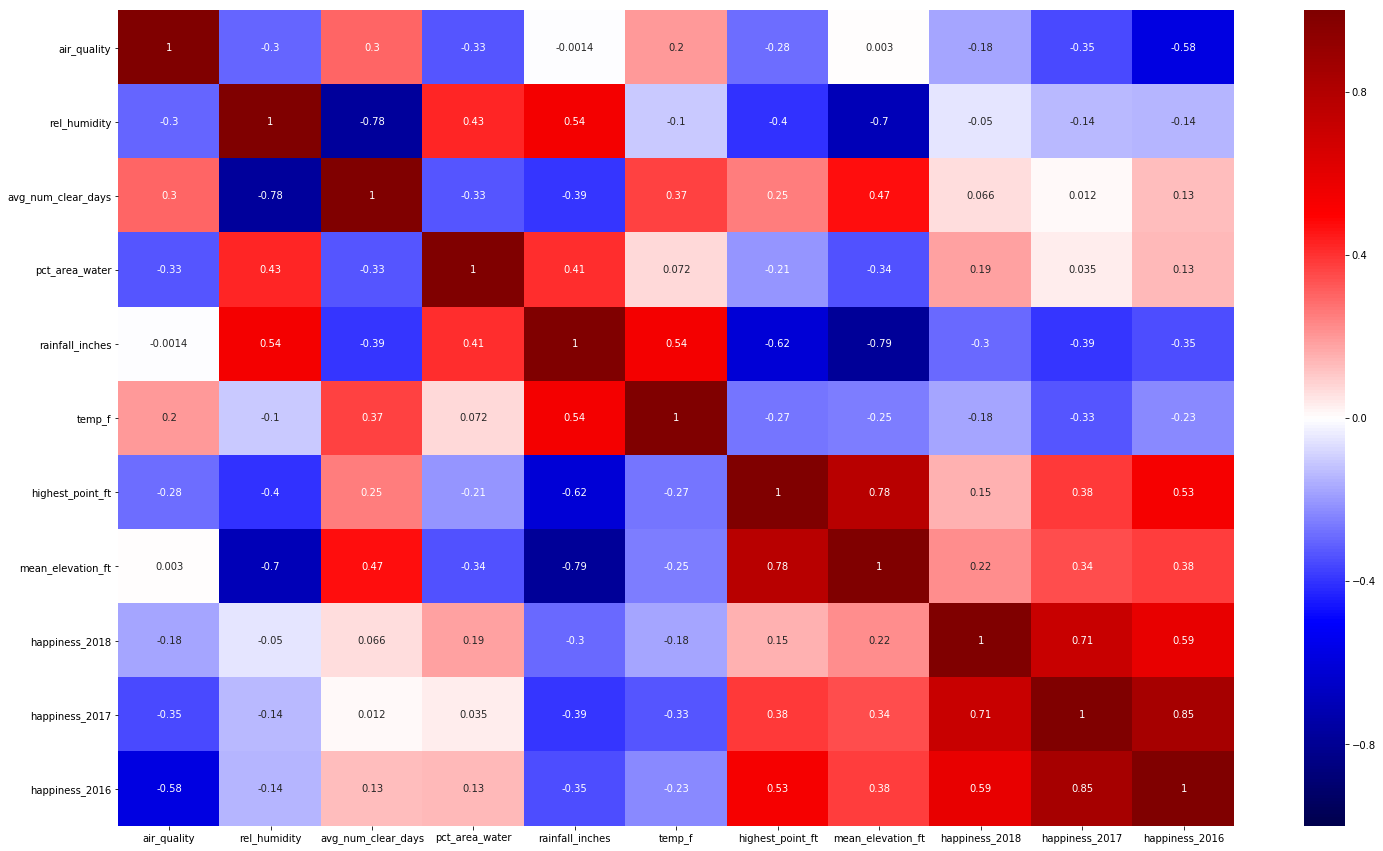

In [35]:
# example of a better corr matrix
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(combined_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

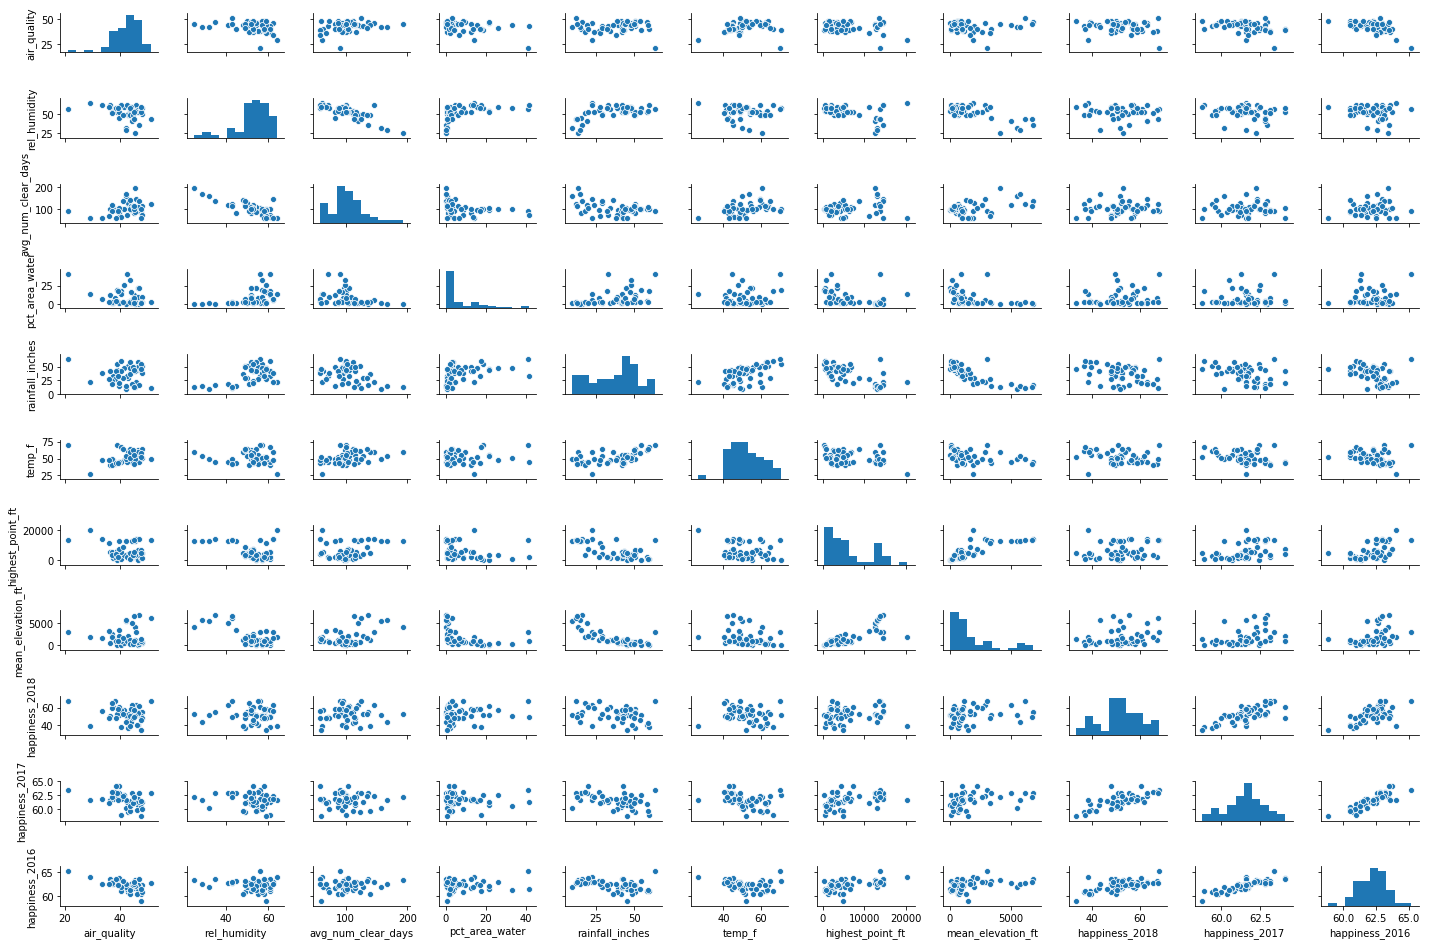

In [12]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(combined_df, height=1.2, aspect=1.5);

### Create a model with all features as a predictor for happiness

In [36]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('happiness_2016 ~ air_quality + rel_humidity + avg_num_clear_days + pct_area_water + rainfall_inches + temp_f + highest_point_ft + mean_elevation_ft', data=combined_df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         happiness_2016   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     6.405
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           2.20e-05
Time:                        12:51:27   Log-Likelihood:                -55.236
No. Observations:                  50   AIC:                             128.5
Df Residuals:                      41   BIC:                             145.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             66.3472      2.626     25.266      0.000      61.044      71.650
air_quality           -0.1080      0.027     -3.959      0.000      -0.163      -0.053
rel_humidity          -0.0029      0.029     -0.098      0.922      -0.062       0.056
avg_num_clear_days     0.0120      0.009      1.358      0.182      -0.006       0.030
pct_area_water         0.0164      0.014      1.208      0.234      -0.011       0.044
rainfall_inches       -0.0017      0.020     -0.087      0.931      -0.042       0.038
temp_f                -0.0207      0.025     -0.823      0.415      -0.071       0.030
highest_point_ft    6.165e-05   4.16e-05      1.484      0.146   -2.23e-05       0.000
mean_elevation_ft  -3.389e-06      0.000     -0.020      0.984      -0.000       0.000
==============================================================================
Omnibus:                        4.179   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                3.358
Skew:                          -0.625   Prob(JB):                        0.187
Kurtosis:                       3.218   Cond. No.                     1.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# fit model with target as happiness
model = sm.OLS(y, X, data=combined_df)

results = model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         happiness_2016   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     6.405
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           2.20e-05
Time:                        12:51:56   Log-Likelihood:                -55.236
No. Observations:                  50   AIC:                             128.5
Df Residuals:                      41   BIC:                             145.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             66.3472      2.626     25.266      0.000      61.044      71.650
air_quality           -0.1080      0.027     -3.959      0.000      -0.163      -0.053
rel_humidity          -0.0029      0.029     -0.098      0.922      -0.062       0.056
avg_num_clear_days     0.0120      0.009      1.358      0.182      -0.006       0.030
pct_area_water         0.0164      0.014      1.208      0.234      -0.011       0.044
rainfall_inches       -0.0017      0.020     -0.087      0.931      -0.042       0.038
temp_f                -0.0207      0.025     -0.823      0.415      -0.071       0.030
highest_point_ft    6.165e-05   4.16e-05      1.484      0.146   -2.23e-05       0.000
mean_elevation_ft  -3.389e-06      0.000     -0.020      0.984      -0.000       0.000
==============================================================================
Omnibus:                        4.179   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                3.358
Skew:                          -0.625   Prob(JB):                        0.187
Kurtosis:                       3.218   Cond. No.                     1.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Create a model with a subset of features as a predictor for happiness

In [38]:
# Create your feature matrix (X) and target vector (y)
y, X2 = patsy.dmatrices('happiness_2016 ~ avg_num_clear_days + pct_area_water + highest_point_ft + air_quality', data=combined_df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X2)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         happiness_2016   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     12.84
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           4.72e-07
Time:                        12:52:06   Log-Likelihood:                -56.472
No. Observations:                  50   AIC:                             122.9
Df Residuals:                      45   BIC:                             132.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             65.2418      1.162     56.151      0.000      62.902      67.582
avg_num_clear_days     0.0092      0.005      2.002      0.051   -5.67e-05       0.019
pct_area_water         0.0126      0.013      1.004      0.321      -0.013       0.038
highest_point_ft    7.746e-05   2.58e-05      3.005      0.004    2.55e-05       0.000
air_quality           -0.1073      0.026     -4.144      0.000      -0.159      -0.055
==============================================================================
Omnibus:                        5.119   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.154
Skew:                          -0.683   Prob(JB):                        0.125
Kurtosis:                       3.361   Cond. No.                     8.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Now, let's try averaging happiness across all years and look at correlation against that:

In [39]:
# Take three happiness columns and average them:
col = combined_df.loc[: , "happiness_2018":"happiness_2016"]
combined_df['happiness_avg'] = col.mean(axis=1)

# Round the happiness average column to two decimal places
combined_df = combined_df.round({'happiness_avg': 2})
combined_df

,air_quality,rel_humidity,avg_num_clear_days,pct_area_water,rainfall_inches,temp_f,highest_point_ft,mean_elevation_ft,happiness_2018,happiness_2017,happiness_2016,happiness_avg
Alabama,46.6,52.0,99.0,3.4,58.3,62.8,2413.0,500.0,39.35,60.8,61.0,53.72
Alaska,29.1,64.0,61.0,14.2,22.5,26.6,20310.0,1900.0,38.21,61.6,64.0,54.60
Arizona,45.4,25.0,193.0,0.3,13.6,60.3,12637.0,4100.0,52.92,62.2,63.4,59.51
Arkansas,43.1,49.0,123.0,2.1,50.6,60.4,2753.0,650.0,36.61,59.4,60.8,52.27
California,46.0,62.0,146.0,4.8,22.2,59.4,14505.0,2900.0,63.14,62.3,63.0,62.81
Colorado,47.1,35.0,136.0,0.4,15.9,45.1,14440.0,6800.0,55.38,62.9,63.5,60.59
Connecticut,45.0,52.0,82.0,12.6,50.3,49.0,2379.0,500.0,58.24,61.7,61.7,60.55
Delaware,46.4,54.0,97.0,21.7,45.7,55.3,447.0,60.0,51.67,60.7,61.4,57.92
Florida,38.9,57.0,101.0,18.5,54.5,70.7,345.0,100.0,51.01,62.4,63.1,58.84
Georgia,48.2,50.0,112.0,3.2,50.7,63.5,4784.0,600.0,55.15,61.3,62.3,59.58


[Text(0.5, 0, 'Air Quality'),
 Text(1.5, 0, 'Humidity'),
 Text(2.5, 0, '# Clear Days'),
 Text(3.5, 0, '% Area Water'),
 Text(4.5, 0, 'Rainfall'),
 Text(5.5, 0, 'Temperature'),
 Text(6.5, 0, 'Highest Point'),
 Text(7.5, 0, 'Mean Elevation'),
 Text(8.5, 0, 'Happiness')]

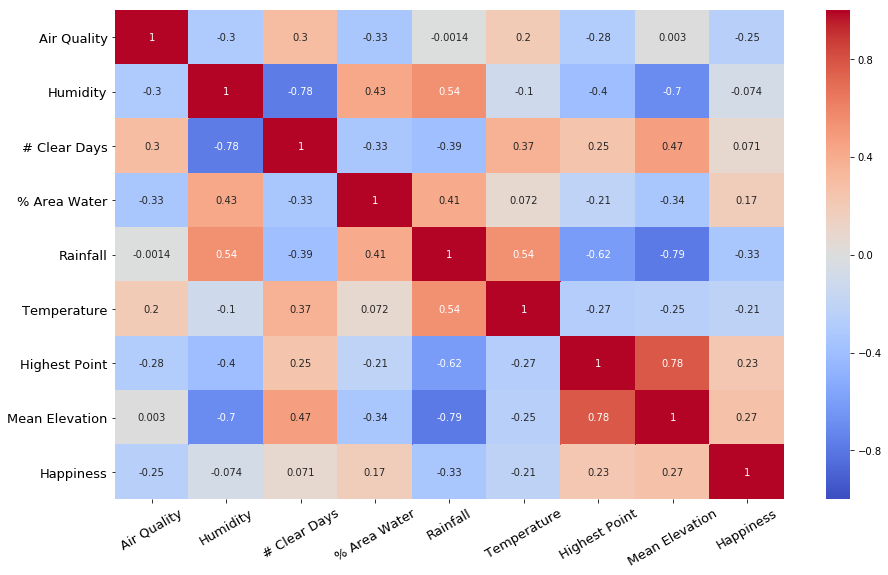

In [63]:
# A heatmap including average happiness and not the other happinesses
new_combined_df = combined_df.drop(labels=['happiness_2018', 'happiness_2017', 'happiness_2016'], axis = 1)
fig, ax = plt.subplots(figsize=(15,9))
heatmap = sns.heatmap(new_combined_df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);

labels = ['Air Quality', 'Humidity', '# Clear Days', '% Area Water', 'Rainfall', 'Temperature', 
         'Highest Point', 'Mean Elevation', 'Happiness']

ax.set_yticklabels(labels, fontsize = 13)
ax.set_xticklabels(labels, rotation=30, fontsize = 13)
# ax.set_title('Feature Correlation Heatmap')
# heatmap.figure.savefig("data/figures/feature_heatmap.png")

In [83]:
# Reorder my columns to create a prettier heatmap
reordered = new_combined_df[['rainfall_inches', 'air_quality', 'temp_f', 'rel_humidity', 'avg_num_clear_days', 'pct_area_water', 'highest_point_ft', 'mean_elevation_ft', 'happiness_avg']]

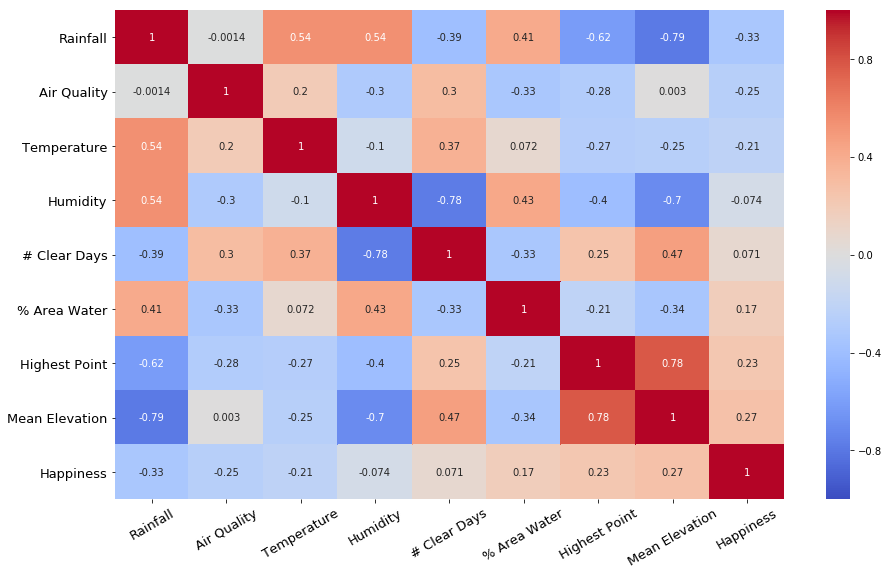

In [85]:
# Create a heatmap based on the list of columns above
fig, ax = plt.subplots(figsize=(15,9))
heatmap = sns.heatmap(reordered.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);

labels = ['Rainfall', 'Air Quality', 'Temperature', 'Humidity', '# Clear Days', '% Area Water', 
         'Highest Point', 'Mean Elevation', 'Happiness']

ax.set_yticklabels(labels, fontsize = 13)
ax.set_xticklabels(labels, rotation=30, fontsize = 13)
# ax.set_title('Feature Correlation Heatmap')
heatmap.figure.savefig("data/figures/feature_heatmap.png")

In [80]:
cols = list(new_combined_df.columns.values)
cols

['air_quality',
 'rel_humidity',
 'avg_num_clear_days',
 'pct_area_water',
 'rainfall_inches',
 'temp_f',
 'highest_point_ft',
 'mean_elevation_ft',
 'happiness_avg']

In [156]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('happiness_avg ~ air_quality + rel_humidity + avg_num_clear_days + pct_area_water + rainfall_inches + temp_f + highest_point_ft + mean_elevation_ft', data=combined_df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          happiness_avg   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     1.780
Date:                Thu, 11 Apr 2019   Prob (F-statistic):              0.109
Time:                        14:12:04   Log-Likelihood:                -124.35
No. Observations:                  50   AIC:                             266.7
Df Residuals:                      41   BIC:                             283.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             62.4370     10.461      5.969      0.000      41.311      83.563
air_quality           -0.1250      0.109     -1.151      0.257      -0.344       0.094
rel_humidity           0.0508      0.116      0.438      0.664      -0.184       0.286
avg_num_clear_days     0.0088      0.035      0.250      0.804      -0.062       0.080
pct_area_water         0.1000      0.054      1.855      0.071      -0.009       0.209
rainfall_inches       -0.1078      0.079     -1.371      0.178      -0.267       0.051
temp_f                 0.0197      0.100      0.197      0.845      -0.183       0.222
highest_point_ft      -0.0001      0.000     -0.610      0.545      -0.000       0.000
mean_elevation_ft      0.0004      0.001      0.547      0.587      -0.001       0.002
==============================================================================
Omnibus:                        3.682   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                2.907
Skew:                          -0.462   Prob(JB):                        0.234
Kurtosis:                       2.264   Cond. No.                     1.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# Send the dataframe of combined data to a pickle
combined_df.to_pickle('~/ds/metis/metisgh/project_luther/data/pickles/combined_df.pkl')